# Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [5]:
df['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
506    0
507    0
508    0
509    0
510    0
Name: CHAS, Length: 511, dtype: int64

In [6]:
df['CHAS'].value_counts()

CHAS
0    476
1     35
Name: count, dtype: int64

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [8]:
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

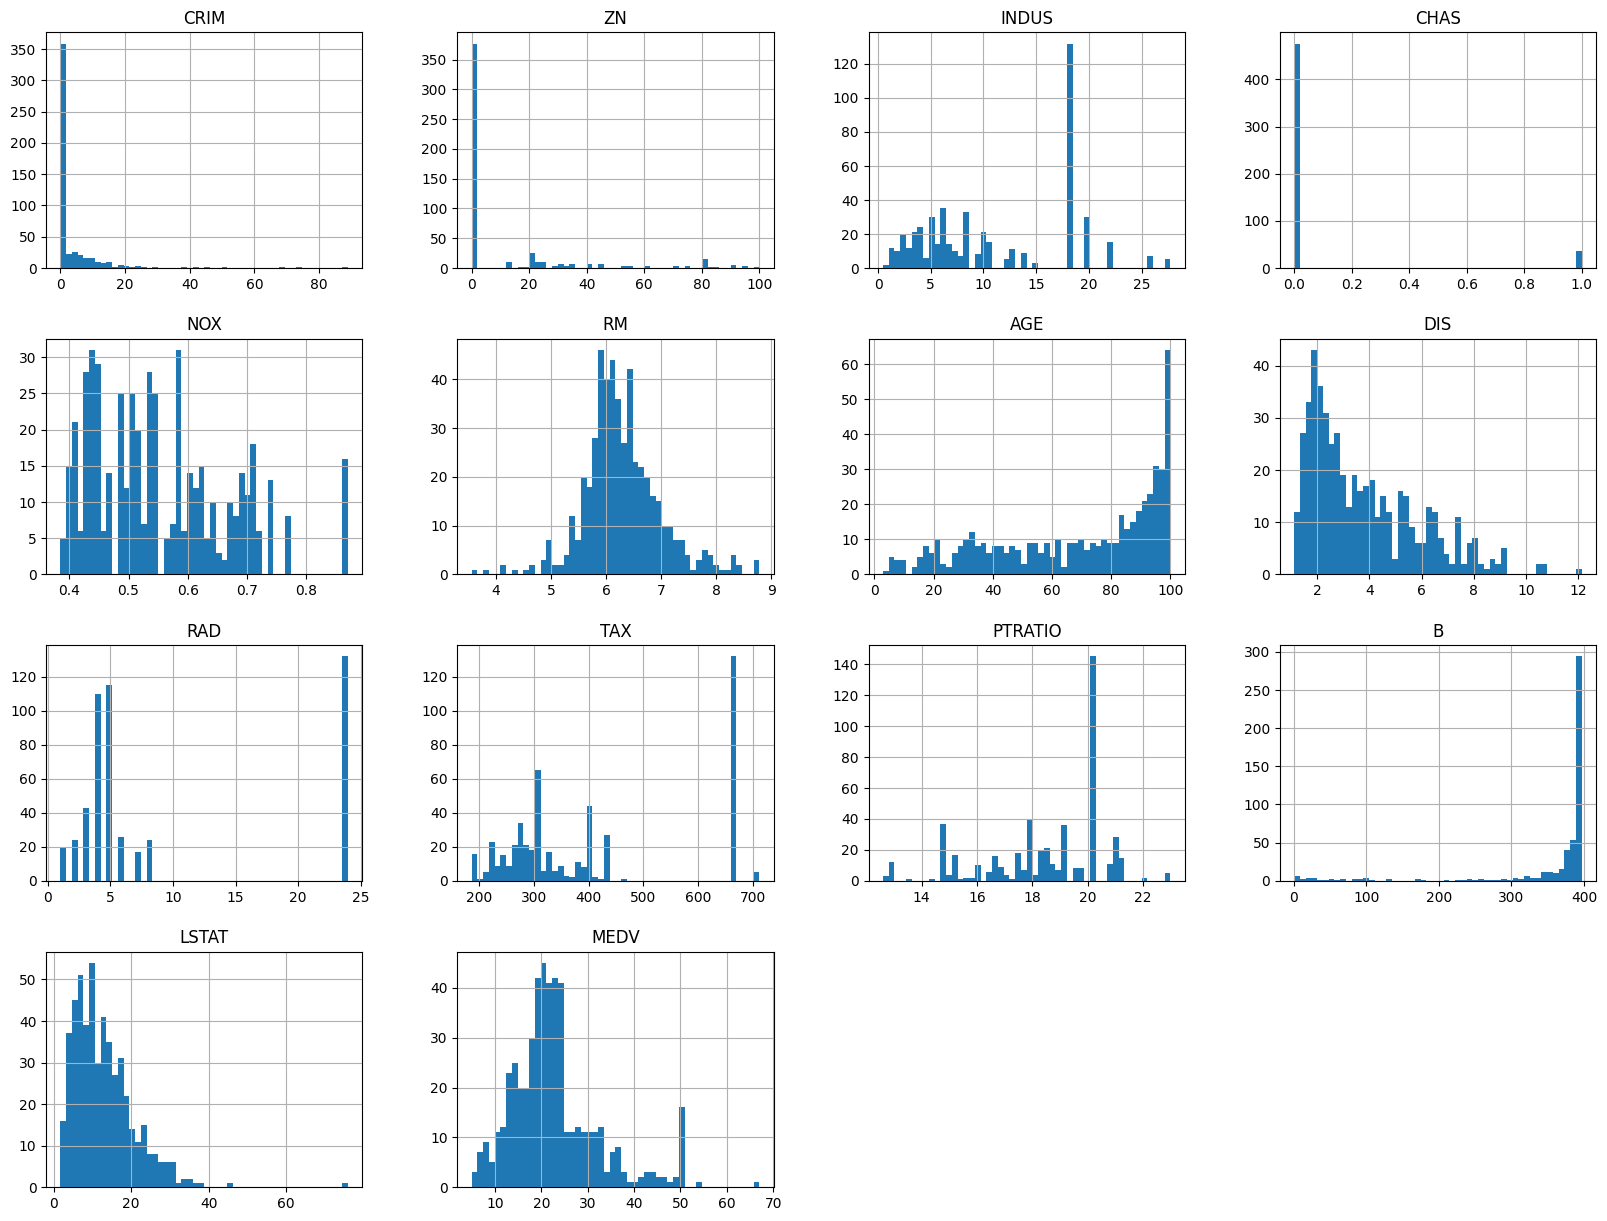

In [9]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

## Train-Test Splitting

In [10]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[:test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set, test_set = split_train_test(df, 0.2)

In [12]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(df, test_size =0.2, random_state =42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 408
Rows in test set: 103



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['CHAS']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [15]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000
mean,3.620674,13.320388,10.263107,0.067961,0.541116,6.360291,66.425243,3.964499,8.766990,392.436893,18.499029,368.482427,12.715728,23.82233
std,10.350426,27.400162,6.746703,0.252910,0.111724,0.702464,27.414494,2.148938,8.580877,166.598535,2.423759,68.391109,9.763726,9.90096
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.00000
25%,0.061400,0.000000,4.905000,0.000000,0.447500,5.942500,44.250000,2.169000,3.500000,270.000000,16.850000,376.635000,7.325000,19.30000
50%,0.217190,0.000000,8.140000,0.000000,0.515000,6.216000,71.600000,3.495200,5.000000,315.000000,19.200000,393.550000,10.110000,21.90000
75%,1.974730,0.000000,18.100000,0.000000,0.611500,6.672500,91.450000,5.570050,8.000000,453.000000,20.200000,396.900000,15.815000,27.50000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.585700,24.000000,711.000000,23.000000,396.900000,76.000000,67.00000


In [16]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 212 to 49
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     103 non-null    float64
 1   ZN       103 non-null    float64
 2   INDUS    103 non-null    float64
 3   CHAS     103 non-null    int64  
 4   NOX      103 non-null    float64
 5   RM       103 non-null    float64
 6   AGE      103 non-null    float64
 7   DIS      103 non-null    float64
 8   RAD      103 non-null    int64  
 9   TAX      103 non-null    int64  
 10  PTRATIO  103 non-null    float64
 11  B        103 non-null    float64
 12  LSTAT    103 non-null    float64
 13  MEDV     103 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.1 KB


In [17]:
strat_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,408.000000,408.000000,408.00000,408.000000,408.000000,403.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,3.574915,10.730392,11.37527,0.068627,0.558200,6.269007,69.169363,3.738277,9.666667,411.227941,18.500245,353.601397,12.920907,22.394363
std,8.066171,22.067428,6.83855,0.253130,0.116078,0.703808,28.275511,2.085949,8.716483,168.222809,2.143483,95.566677,7.230954,9.366740
min,0.006320,0.000000,0.74000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.087962,0.000000,5.32000,0.000000,0.453000,5.876500,45.075000,2.062000,4.000000,284.000000,17.400000,374.617500,6.927500,16.475000
50%,0.286735,0.000000,9.90000,0.000000,0.538000,6.208000,77.950000,3.107300,5.000000,335.000000,19.050000,390.980000,11.705000,21.000000
75%,3.716458,12.500000,18.10000,0.000000,0.625750,6.629500,94.150000,4.978850,24.000000,666.000000,20.200000,395.645000,17.272500,25.000000
max,73.534100,100.000000,27.74000,1.000000,0.871000,8.704000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,36.980000,54.000000


In [18]:
strat_train_set['CHAS'].value_counts()

CHAS
0    380
1     28
Name: count, dtype: int64

In [19]:
strat_test_set['CHAS'].value_counts()

CHAS
0    96
1     7
Name: count, dtype: int64

In [20]:
#380/28

In [21]:
#96/7

In [22]:
df= strat_train_set.copy()

# Looking for Correlations

In [23]:
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.681481
B          0.350283
ZN         0.341767
DIS        0.250670
CHAS       0.191563
AGE       -0.366230
RAD       -0.381955
CRIM      -0.395849
NOX       -0.425104
TAX       -0.467171
PTRATIO   -0.475870
INDUS     -0.481414
LSTAT     -0.720350
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

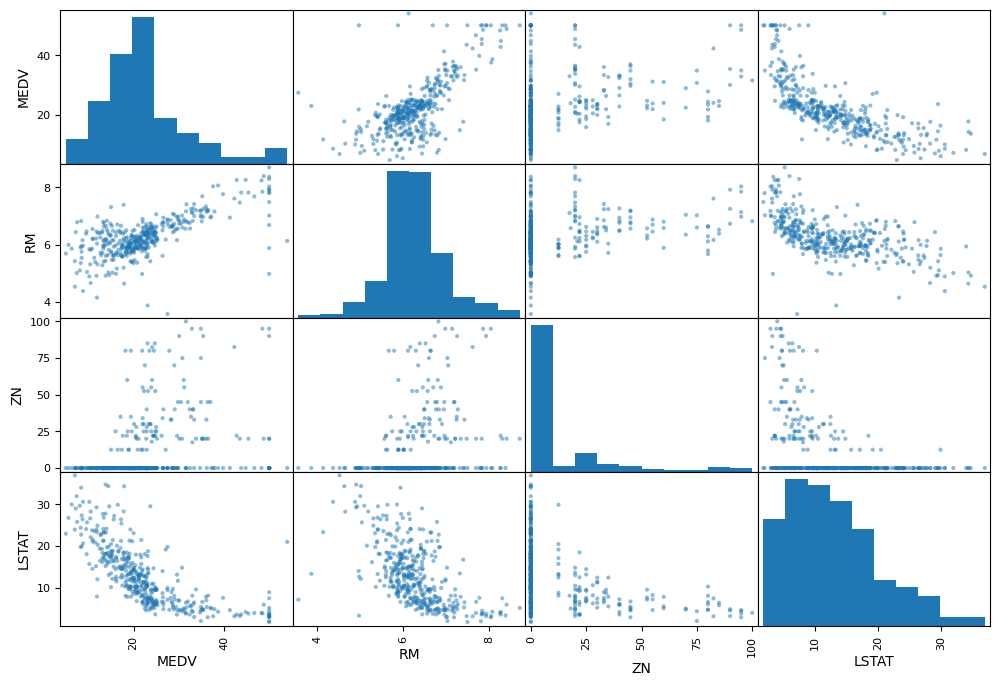

In [24]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV" , "RM", "ZN", "LSTAT"]
scatter_matrix(df[attributes],figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

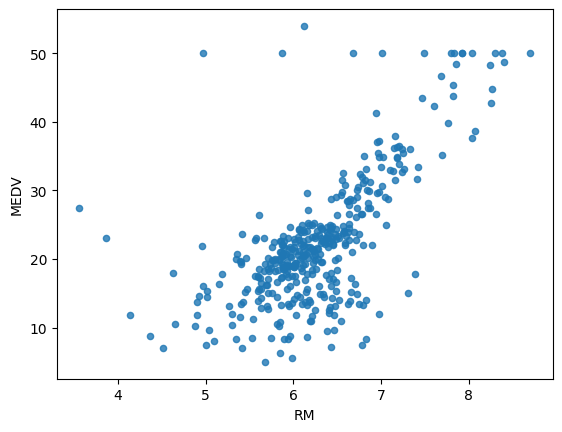

In [25]:
df.plot(kind = "scatter", x="RM", y="MEDV",alpha=0.8)

##  Trying out Attribute Combination

In [26]:
df["TAXRM"] = df['TAX']/df['RM']

In [27]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,23.1,68.959436
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5,187.026116
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03,31.1,38.970588
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9,NaN


In [28]:
df = strat_train_set.drop("MEDV",axis=1)
df_labels = strat_train_set["MEDV"].copy()

## Missing attributes

In [29]:
df.dropna(subset=["RM"])
df.shape

(408, 13)

In [30]:
df.drop("RM", axis=1).shape

(408, 12)

In [31]:
median = df["RM"].median()

In [32]:
df["RM"].fillna(median)

495    5.670
254    6.108
365    3.561
193    6.800
35     6.208
       ...  
386    4.652
243    6.393
22     6.142
480    6.242
455    6.525
Name: RM, Length: 408, dtype: float64

In [33]:
df.shape

(408, 13)

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(df)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20800e+00, 7.79500e+01, 3.10730e+00, 5.00000e+00, 3.35000e+02,
       1.90500e+01, 3.90980e+02, 1.17050e+01])

In [36]:
X = imputer.transform(df)

In [37]:
df_tr = pd.DataFrame(X, columns=df.columns)

In [38]:
df_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,408.000000,408.000000,408.00000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,3.574915,10.730392,11.37527,0.068627,0.558200,6.268260,69.169363,3.738277,9.666667,411.227941,18.500245,353.601397,12.920907
std,8.066171,22.067428,6.83855,0.253130,0.116078,0.699504,28.275511,2.085949,8.716483,168.222809,2.143483,95.566677,7.230954
min,0.006320,0.000000,0.74000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.087962,0.000000,5.32000,0.000000,0.453000,5.878750,45.075000,2.062000,4.000000,284.000000,17.400000,374.617500,6.927500
50%,0.286735,0.000000,9.90000,0.000000,0.538000,6.208000,77.950000,3.107300,5.000000,335.000000,19.050000,390.980000,11.705000
75%,3.716458,12.500000,18.10000,0.000000,0.625750,6.626000,94.150000,4.978850,24.000000,666.000000,20.200000,395.645000,17.272500
max,73.534100,100.000000,27.74000,1.000000,0.871000,8.704000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,36.980000


## Scikit-Learn Design

## Primarily, three types of objects
Estimators - estimate some parameter based on a dataset. e.g-imputer.
It has fit and transform method.
Transformers - transform method takes input and returns output based on learnings from fit().
predictors - Linear Regression model is an example of predictor.

## Feature Scaling 
Primarily , two types of features scaling methods:
1. Min-max scaling (Normalization)
(value-min)/(max-min)
Sklearn provides a class called MinMaxScaler for this 
2. Standardization
value - mean

# Creating a Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
                       ('std_scaler', StandardScaler()),
])

In [40]:
df_num_tr = my_pipeline.fit_transform(df_tr)

In [41]:
df_num_tr.shape

(408, 13)

## Selecting desired model for Dragon Real Estates

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(df_num_tr, df_labels)

RandomForestRegressor()

In [43]:
some_data = df.iloc[:5]

In [44]:
some_labels = df_labels.iloc[:5]

In [45]:
prepared_data = my_pipeline.transform(some_data)

In [46]:
model.predict(prepared_data)

array([21.551, 22.16 , 25.393, 31.045, 20.068])

In [47]:
list(some_labels)

[23.1, 21.9, 27.5, 31.1, 18.9]

# Evaluating the model

In [48]:
from sklearn.metrics import mean_squared_error
df_predictions  = model.predict(df_num_tr)
mse = mean_squared_error(df_labels, df_predictions)
rmse = np.sqrt(mse)

In [49]:
rmse

1.4472534865778555

# Using better evaluation technique - Cross Validation

In [50]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df_num_tr, df_labels, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

In [51]:
rmse_scores

array([3.29252379, 4.61711364, 2.70692543, 5.48967643, 3.88441162])

In [52]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:",scores.mean())
    print("Standard deviation :",scores.mean())

In [53]:
print_scores(rmse_scores)

Scores: [3.29252379 4.61711364 2.70692543 5.48967643 3.88441162]
Mean: 3.9981301840639114
Standard deviation : 3.9981301840639114


# Saving the model

In [54]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

# Testing the model on test data

In [62]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions, list(Y_test))

In [60]:
final_rmse

4.8295965499150615

In [63]:
prepared_data[0]

array([-0.42152521, -0.48685178, -0.24673925, -0.27144836,  0.2311586 ,
       -0.85631303, -1.42946756, -0.4510327 , -0.42117544, -0.12039257,
        0.3268577 ,  0.41580739,  0.64788652])

## Using the model

In [64]:
from joblib import dump,load
import numpy as np
model = load('Dragon.joblib')
input = np.array([[-0.42152521, -0.48685178, -0.24673925, -0.27144836,  0.2311586 ,
       -0.85631303, -1.42946756, -0.4510327 , -0.42117544, -0.12039257,
        0.3268577 ,  0.41580739,  0.64788652]])
model.predict(input)

array([21.551])